In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)

# Classification example

In [ ]:
data = pd.read_csv("iris.csv")
data.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data.iloc[:50, 2], data.iloc[:50, 3], c='r', label='Iris-setosa')
plt.scatter(data.iloc[50:100, 2], data.iloc[50:100, 3], c='g',label='Iris-versicolor')
plt.scatter(data.iloc[100:, 2], data.iloc[100:, 3], c='b',label='Iris-virginica')

plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Petal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Petal length vs. Petal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

In [ ]:
sns.boxplot(x = "species", y = "petal_length", data=data)
plt.show()

In [ ]:
y = data.species
X = data.drop("species", axis=1)
print(X.head())
feature_list = list(X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix: \n",metrics.confusion_matrix(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=["iris-setosa", "iris-versicolor", "iris-virginica"])
plt.title('Confusion Matrix',fontsize=30)
plt.show()


In [ ]:
new_point = [[6.5, 3.0, 3.1, 0.8],
             [6.5,3.0, 2.5,0.7],
            [ 6.5,3.0,6.0,1.0],
            [6.5, 3.0, 1.0, 0.5],
            [6.5, 3.0, 7.0, 2.5]]
new_value = pd.DataFrame(new_point)
new_value.columns = X_test.columns
new_value

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(data.iloc[:50, 2], data.iloc[:50, 3], c='r', label='Iris-setosa')
plt.scatter(data.iloc[50:100, 2], data.iloc[50:100, 3], c='g',label='Iris-versicolor')
plt.scatter(data.iloc[100:, 2], data.iloc[100:, 3], c='b',label='Iris-virginica')

plt.scatter(new_value.iloc[:,2], new_value.iloc[:,3], c="k", marker = "*", label = "to classify", s=200)

plt.xlabel('Pepal length',fontsize=20)
plt.ylabel('Pepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Pepal length vs. Pepal width',fontsize=20)
plt.legend(prop={'size': 12})
plt.show()

In [ ]:
predict_label = rf.predict(new_value)

result = pd.concat([new_value, pd.Series(predict_label)], axis=1)
result.columns = list(X.columns) + ["species"]

sns.lmplot("petal_length", "petal_width", data=result, hue="species", fit_reg=False,
           markers="*", 
           scatter_kws={"s": 200},
          palette={"setosa":"red", "virginica":"blue", "versicolor":"green"},
          legend=False)

plt.legend(prop={'size': 12})
plt.scatter(data.iloc[:50, 2], data.iloc[:50, 3], c='r', label='setosa')
plt.scatter(data.iloc[50:100, 2], data.iloc[50:100, 3], c='g',label='versicolor')
plt.scatter(data.iloc[100:, 2], data.iloc[100:, 3], c='b',label='virginica')

plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Petal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Petal length vs. Petal width',fontsize=20)

plt.show()

# Regression example  

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, roc_auc_score

def diagnose_regression_model(model, X_train, y_train, X_test, y_test):
    """
    Compute many regression metrics on train and test sets
    """
    test_preds = model.predict(X_test)
    train_preds = model.predict(X_train)
    
    print("Train R² = {:.3f}".format(model.score(X_train, y_train)))
    print("Test R² = {:.3f}\n".format(model.score(X_test, y_test))) 
    
    print("Train RMSE = {:.3f}".format(np.sqrt(mean_squared_error(y_train, train_preds))))
    print("Test RMSE = {:.3f}\n".format(np.sqrt(mean_squared_error(y_test, test_preds))))    
    
    print("Train MAE = {:.3f}".format(mean_absolute_error(y_train, train_preds)))
    print("Test MAE = {:.3f}".format(mean_absolute_error(y_test, test_preds))) 
    
    compare_density_function_prediction_2(y_train, train_preds, y_test, test_preds)

def compare_density_function_prediction_2(y_train, train_preds, y_test, test_preds):
    """
    Displays density curve or real and predicted values for train and test 
    """
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
    
    sns.distplot(train_preds, hist=False, color="b", label="Train Fitted" , kde_kws={"lw": 2, "linestyle": "-"}, ax=ax1)
    sns.distplot(y_train, hist=False, color="k", label="Train Actual",  kde_kws={"lw": 2, "linestyle": "-"}, ax=ax1)
    
    sns.distplot(test_preds, hist=False, color="b", label="Test Fitted" , kde_kws={"lw": 2, "linestyle": "-"}, ax=ax2)
    sns.distplot(y_test, hist=False, color="k", label="Test Actual" , kde_kws={"lw": 2, "linestyle": "-"}, ax=ax2)

    plt.title('Actual vs Fitted Values')


    plt.show()
    plt.close()

In [ ]:
from sklearn.linear_model import LinearRegression

y = data.petal_width
X = data.drop(["petal_width"], axis=1)
X = pd.get_dummies(X)

feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


diagnose_regression_model(lr, X_train, y_train, X_test, y_test)

In [ ]:
a = pd.Series(y_test).reset_index().drop("index", axis=1)
b = pd.Series(y_pred).round(2)

results = pd.concat([a, b], axis=1)
results.columns = ["sepal_length", "prediction"]
results["difference"] = results["sepal_length"] - results["prediction"]
results.head()

In [ ]:
sns.lmplot(x = "sepal_length", y="petal_length", data=data)
plt.show()

In [ ]:
sns.lmplot(x = "sepal_length", y="petal_length", data=data,hue="species")
plt.show()

In [ ]:
new_point = [
    [3.0, 6.0, 0.7, 0, 1, 0],
    [3.0, 3.0, 0.7, 0, 1, 0],
    [3.0, 5.0, 0.7, 0, 0, 1]
]
new_value = pd.DataFrame(new_point)
new_value.columns = X_test.columns
new_value

In [ ]:
predict_label = lr.predict(new_value)

new_value = pd.concat([new_value, pd.Series(predict_label)], axis=1)
new_value.columns = list(X.columns) + ["petal_width"]

#plt.scatter(new_value.iloc[:,2], new_value.iloc[:,3], c="k", marker = "*", label = "to classify")
sns.lmplot("sepal_width", "petal_length", data=new_value, fit_reg=False,
           markers="*", 
           scatter_kws={"s": 200},
          legend=False)

plt.scatter(data["sepal_width"], data["petal_length"])

plt.ylabel('Petal length',fontsize=20)
plt.xlabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal width vs. Petal length',fontsize=20)
plt.show()

# Exercise: Pulsar dataset

We will use again the same pulsar dataset as before. 

But this time your goal here is to build a model that can predict which ones are pulsars

## Data import

In [ ]:
# pd.options.display.float_format = '{:,.3f}'.format

Import the HTRU_2 csv file and have a look at it using

In [ ]:
df = pd.read_csv("HTRU_2.csv")
df.head()

have a look at the statistics of every columns to have a better idea of what is in the dataset

In [ ]:
df.describe()

In [ ]:
# no need to run this cell (because it will take some time)
import seaborn as sns
sns.pairplot(df, hue="target")

## Data prep

* Extract target values in a variables and other columns in another
* create the training and test sets by using train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

y = df["target"].copy()
X = df.drop("target", axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

let's check the target distribution

In [ ]:
print("For training: ", y_train.mean())
print("For testing: ", y_test.mean())

## Modeling

* Create an instance of a RandomForestClassifier
* fit it to your training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=42) # change parameters to find better results
model.fit(X_train, y_train)

Evaluate the accuracy on the training and test sets using the score() method of your model

In [ ]:
print("Accuracy on train set = ", round(model.score(X_train, y_train)*100,1), "%")
print("Accuracy on test set = ", round(model.score(X_test, y_test)*100,1), "%")

create predictions for your train and test sets and store them in 2 variables

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, test_preds), columns=["pred 0", "pred 1"], index=["real 0", "real 1"])

Compute the precision and recall for both the training and test sets

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("For training")
print("train precision = ", round(precision_score(y_train, train_preds)*100, 1), "%")
print("train recall = ", round(recall_score(y_train, train_preds)*100, 1), "%")

print("\nFor testing")
print("test precision = ", round(precision_score(y_test, test_preds)*100, 1), "%")
print("test recall = ", round(recall_score(y_test, test_preds)*100, 1), "%")

In [ ]:
feat_imp = pd.concat([pd.Series(X_test.columns), pd.Series(model.feature_importances_)], axis=1)
feat_imp.columns = ["feature", "importance"]
feat_imp.sort_values(by="importance", ascending=True, inplace=True)
feat_imp.plot.barh(x="feature", figsize=(10,6))

You see that only 2 variables were used?!?

That's because we defined a random forest with only 2 trees for now :) 

You goal now is to go back to your model definition and change its parameters until you get the best performance possible on the test set. 

# Going further

This introductory training to machine learning showed you how creating predictive models can be.

However note that we used a very simple dataset, with no cleaning steps and only numerical variables.

In practice we often need to go back and forth between modeling and cleaning until we achieve desired results.

Also model tuning and refinement might require some time with big datasets and you don't always have a well defined target.

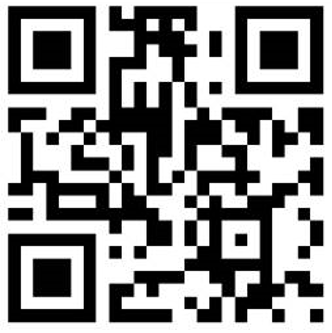